In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(s):
        return 1.0/(1.0 + np.exp(-s))

def init_network(input_dim, hidden_dim, output_dim):
    W = np.random.randn(input_dim, hidden_dim)
    b = np.random.randn(hidden_dim)
    V = np.random.randn(hidden_dim, output_dim )
    c = np.random.randn(output_dim)
    return W, b, V, c

def forward(x, W, b, V, c):
    z = sigmoid(np.matmul(x, W) - b)
    y = sigmoid(np.matmul(z, V) - c)
    return z, y

def backward(x, true_y, W, b, V, c, lr=0.01):
    z, y = forward(x, W, b, V, c)
    delta_y = (y - true_y)*y*(1-y)
    delta_z = delta_y.dot(V.T)*z*(1-z)

    V = V - lr * np.matmul(z.T, delta_y)
    W = W - lr * np.matmul(x.T, delta_z)
    c = c - lr * np.sum(delta_y,axis=0)*(-1.)
    b = b - lr * np.sum(delta_z,axis=0)*(-1.)
    return W, b, V, c

In [ ]:
#from tensorflow.keras import datasets
#mnist = datasets.mnist
#(train_x, train_y), (test_x, test_y) = mnist.load_data()
#samples, labels = train_x, train_y

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
samples, labels = mnist.data, mnist.target
samples = samples.values/255 # normalize

#print(labels[0:2])

sample_num = samples.shape[0]
print(sample_num)
one_hot_labels = np.zeros([sample_num,10])

for i in range(sample_num):
    one_hot_labels[i, int(labels[i])] = 1.

print(one_hot_labels[0])

70000
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Label: 0, one_hot_encoding: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.].
(784,)
(28, 28)


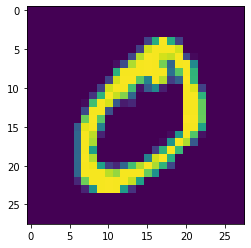

In [ ]:
index = 1 #You may change the index from 0 to 69999
img = samples[index,:]
print( 'Label: %s, one_hot_encoding: %s.'%(labels[index], one_hot_labels[index,:]) )

print(img.shape)
img = img.reshape(28,28)
print(img.shape)

plt.imshow(img)
plt.show()

In [ ]:
batch_size = 400 # 데이터를 400개씩 나눠서 반복 학습(1 epoch 당)
epoch_num = 200 # 전체 데이터는 총 200번 학습

W, b, V, c = init_network(input_dim=784, hidden_dim=200, output_dim=10)
epoch_dat = []
error_dat = []
for epoch in range (epoch_num):
    for a in range(int(sample_num/batch_size)):

        start = np.random.randint(50000)
        x = samples[start:start+batch_size, :]
        x = x.reshape(x.shape[0],784)
        true_y = one_hot_labels[start:start+batch_size, :]

        W, b, V, c = backward(x, true_y, W, b, V, c, lr=0.02)
        z, y = forward(x, W, b, V, c)
        error = y - true_y
        train_error = np.sum(error*error)
        print(train_error)

    epoch_dat.append(epoch)
    error_dat.append(train_error/batch_size)

    if epoch % 10 == 0:
        print( 'epoch: %d/%d, error: %d/%d'%(epoch, epoch_num, train_error, batch_size))

plt.plot(epoch_dat, error_dat, '-*')
plt.show()

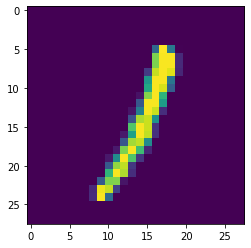

true_label = 1, predicted_label =1


In [ ]:
index = 99
img = samples[99,:]
true_label = labels[99]

plt.imshow(img.reshape(28,28))
plt.show()

x = img.reshape(784)
z, y = forward(x, W, b, V, c)
print('true_label = %s, predicted_label =%d' %(true_label, np.argmax(y)))

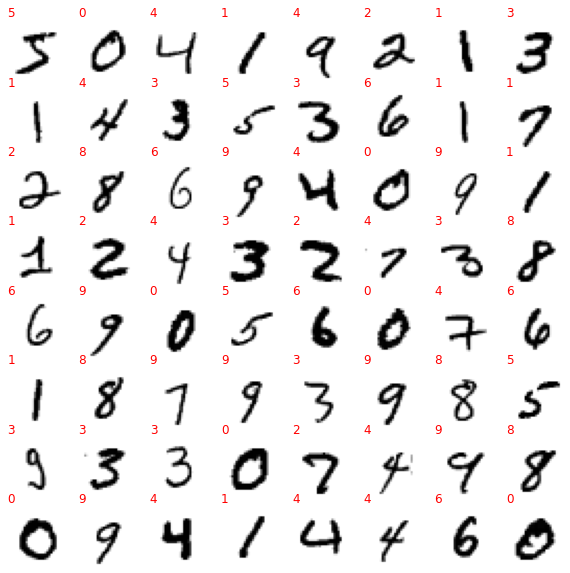

In [ ]:
x = samples[0:64]
x = x.reshape(x.shape[0],784)
z, y = forward(x, W, b, V, c)
label_pred = np.argmax(y, axis=1)

figure = plt.figure(figsize=(10,10))
num_of_images = 64
for index in range(1,num_of_images+1):
    plt.subplot(8, 8, index)
    plt.imshow(x[index-1].reshape(28,28),cmap='gray_r')
    plt.axis('off')
    plt.title('{}'.format(label_pred[index-1]),loc='left',color='r')